In [16]:
#read dataset
import pandas as pd
data = pd.read_csv("data.csv")
data.head(10)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.0,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.0,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.0,10.00,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.0,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.0,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
5,5,Arabica,ji-ae ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,30 kg,Specialty Coffee Institute of Asia,2013,"September 3rd, 2013",Ji-Ae Ahn,NaN,Natural / Dry,8.58,8.42,8.42,8.50,8.25,8.33,10.00,10.0,10.00,8.33,88.83,0.11,0,0.0,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
6,6,Arabica,hugo valdivia,Peru,NaN,NaN,hvc,NaN,richmond investment-coffee department,NaN,NaN,HVC,100,69 kg,Specialty Coffee Institute of Asia,2012,"September 17th, 2012",Hugo Valdivia,Other,Washed / Wet,8.42,8.50,8.33,8.50,8.25,8.25,10.00,10.0,10.00,8.50,88.75,0.11,0,0.0,Bluish-Green,0,"September 17th, 2013",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
7,7,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,oromia,Bazen Agricultural & Industrial Dev't Plc,300,60 kg,Ethiopia Commodity Exchange,March 2010,"September 2nd, 2010",Ethiopia Commodity Exchange,NaN,NaN,8

In [17]:
data = data.drop("Unnamed: 0",axis=1)#drop first columns
data = data.dropna()#drop null value
target = data["Total.Cup.Points"]#select the target column
#select the importance columns
selected_data = data[["Harvest.Year","Grading.Date","Species","Country.of.Origin",
                      "Processing.Method","Moisture","Color","Altitude"]]
selected_data = pd.DataFrame(selected_data)
selected_data.head(10)

,Harvest.Year,Grading.Date,Species,Country.of.Origin,Processing.Method,Moisture,Color,Altitude
29,2015,"May 18th, 2016",Arabica,Taiwan,Pulped natural / honey,0.00,Green,1200
115,2016,"May 18th, 2016",Arabica,Taiwan,Natural / Dry,0.00,Green,350
125,2016,"June 26th, 2017",Arabica,El Salvador,Washed / Wet,0.00,Blue-Green,1350
128,2015,"October 4th, 2016",Arabica,Costa Rica,Washed / Wet,0.10,Blue-Green,1150
129,2015,"June 1st, 2016",Arabica,Guatemala,Washed / Wet,0.10,Green,1600
159,2016,"March 14th, 2017",Arabica,Uganda,Washed / Wet,0.11,Green,1750
171,2016,"March 23rd, 2017",Arabica,Costa Rica,Washed / Wet,0.10,Blue-Green,1300
172,2017,"March 14th, 2017",Arabica,Indonesia,Other,0.00,Blue-Green,1400
182,2016,"April 4th, 2016",Arabica,Honduras,Washed / Wet,0.11,Green,1500
191,2016,"August 10th, 2017",Arabica,Taiwan,Washed / Wet,0.12,Blue-Green,1000


In [18]:
from sklearn.preprocessing import LabelEncoder
#convert all non numerical columns to numerical columns
en = LabelEncoder()
selected_data["Grading.Date"] = en.fit_transform(selected_data["Grading.Date"])
selected_data["Species"] = en.fit_transform(selected_data["Species"])
selected_data["Country.of.Origin"] = en.fit_transform(selected_data["Country.of.Origin"])
selected_data["Processing.Method"] = en.fit_transform(selected_data["Processing.Method"])
selected_data["Color"] = en.fit_transform(selected_data["Color"])
selected_data["Harvest.Year"] = en.fit_transform(selected_data["Harvest.Year"])
selected_data.head(10)

,Harvest.Year,Grading.Date,Species,Country.of.Origin,Processing.Method,Moisture,Color,Altitude
29,0,49,0,10,2,0.00,2,1200
115,1,49,0,10,0,0.00,2,350
125,1,35,0,3,3,0.00,0,1350
128,0,57,0,2,3,0.10,0,1150
129,0,30,0,4,3,0.10,2,1600
159,1,42,0,12,3,0.11,2,1750
171,1,45,0,2,3,0.10,0,1300
172,3,42,0,7,1,0.00,0,1400
182,1,2,0,5,3,0.11,2,1500
191,1,7,0,10,3,0.12,0,1000


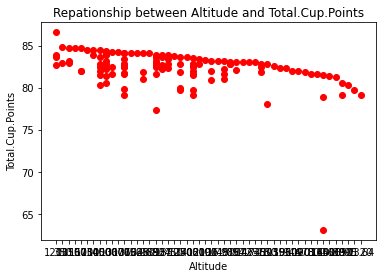

In [19]:
#Repationship between Altitude and Total.Cup.Points
import matplotlib.pyplot as plt
plt.scatter(selected_data["Altitude"],target,c="r")
plt.xlabel("Altitude")
plt.ylabel("Total.Cup.Points")
plt.title("Repationship between Altitude and Total.Cup.Points")
plt.show()

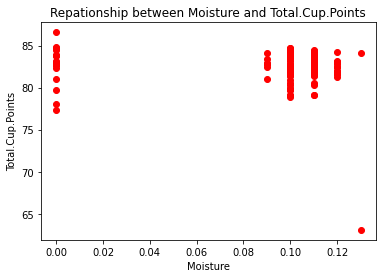

In [20]:
#Repationship between Moisture and Total.Cup.Points
plt.scatter(selected_data["Moisture"],target,c="r")
plt.xlabel("Moisture")
plt.ylabel("Total.Cup.Points")
plt.title("Repationship between Moisture and Total.Cup.Points")
plt.show()

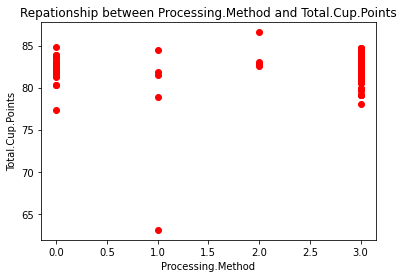

In [21]:
#Repationship between Processing.Method and Total.Cup.Points
plt.scatter(selected_data["Processing.Method"],target,c="r")
plt.xlabel("Processing.Method")
plt.ylabel("Total.Cup.Points")
plt.title("Repationship between Processing.Method and Total.Cup.Points")
plt.show()

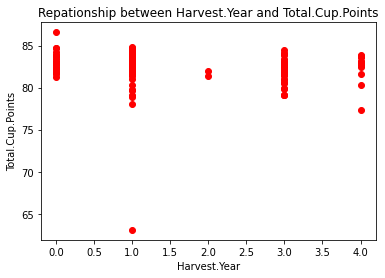

In [22]:
#Repationship between Harvest.Year and Total.Cup.Points
plt.scatter(selected_data["Harvest.Year"],target,c="r")
plt.xlabel("Harvest.Year")
plt.ylabel("Total.Cup.Points")
plt.title("Repationship between Harvest.Year and Total.Cup.Points")
plt.show()

In [23]:
#split data to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(selected_data,target,train_size=0.8)

In [24]:
#apply linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [25]:
#evaluate the linear regression model
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error for linear regression: %.2f" % mean_squared_error(y_test, lr_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination for linear regression: %.2f" % r2_score(y_test, lr_pred))

Mean squared error for linear regression: 15.73
Coefficient of determination for linear regression: -3.94


In [26]:
#apply SVM rgressior model
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_test)

In [27]:
#evaluate the SVR regression model
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error for SVR regression: %.2f" % mean_squared_error(y_test, svr_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination for SVR regression: %.2f" % r2_score(y_test, svr_pred))

Mean squared error for SVR regression: 3.27
Coefficient of determination for SVR regression: -0.03
